# Outside Temperature

Technical Challenge for Data Science Candidates. Prototyping for question 1.

  - a. What is the average time of hottest daily temperature (over month);
  - b. What time of the day is the most commonly occurring hottest time;
  - c. Which are the Top Ten hottest times on distinct days, preferably sorted by date order.
  
Sometimes, it difficult to interpret a metric if one doesn't know what it will be used for.

## What is the average time of hottest daily temperature (over month)

"Time" could mean duration as well, then this would be interpreted differently as: how long does the maximum daily temperature persist. This would be a better indicator of the average temperature.

But the other questions suggest that "Time" means time-of-day. So the question can be interpreted as what is the usual time that the highest daily temperature occurs.

That is problematic. The same peak temperature could occur at two or more times of the day. And to make sure each day is equally weighted, we should choose just one time for the peak temperature on that day.

If we average the times for the peak temperatures on any one day. We must hope that each the peak temperature time-slots are contiguous. If they are not, it might be the hot-spots are 11am and 1pm, then the average time is 12pm, which would be wrong.

An inspection of the data suggests that contiguous periods are usual, so the method is relatively safe.

I've found the maximum temperature on each day. Found the times at which that occurred and averaged across the times.

Then I've averaged across all the days for the average monthly temperature.

## What time of the day is the most commonly occurring hottest time

This is simpler to derive. This is the statistical mode and by comparison it shows that the average calculated previously is not inaccurate.

## Which are the Top Ten hottest times on distinct days, preferably sorted by date order.

I've interpreted this as: for the ten distinct days that have the highest temperatures, find the times at which the daily maxima occur.

Because the maxima can occur in multiple time-slots, this means there are more than ten records.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
from cycler import cycler
import matplotlib.pyplot as plt

pd.__version__

'0.24.2'

In [2]:
# If you turn this feature on, you can display each result as it happens.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df0 = pd.read_csv("cache/bak/200606.csv", sep=",")

In [4]:
df0.info()
df0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 17 columns):
Date                      4463 non-null object
Time                      4463 non-null object
Temp Humidity Index       4463 non-null float64
Outside Temperature       4463 non-null float64
WindChill                 4463 non-null float64
Hi Temperature            4463 non-null float64
Low Temperature           4463 non-null float64
Outside Humidity          4463 non-null int64
DewPoint                  4463 non-null float64
WindSpeed                 4463 non-null int64
Hi                        4463 non-null int64
Wind Direction            4463 non-null object
Rain                      4463 non-null float64
Barometer                 4463 non-null float64
Inside  Temperature       4463 non-null float64
Inside  Humidity          4463 non-null int64
ArchivePeriod             4463 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 592.8+ KB


,Date,Time,Temp Humidity Index,Outside Temperature,WindChill,Hi Temperature,Low Temperature,Outside Humidity,DewPoint,WindSpeed,Hi,Wind Direction,Rain,Barometer,Inside Temperature,Inside Humidity,ArchivePeriod
0,31/05/2006,09:00,9.3,9.3,9.3,9.7,9.1,55,0.8,1,7,NNW,0.0,1015.4,21.7,38,10
1,31/05/2006,09:10,10.1,10.1,10.1,10.4,9.7,53,0.9,2,5,NE,0.0,1015.3,21.9,38,10
2,31/05/2006,09:20,10.7,10.7,10.7,11.0,10.4,52,1.3,2,5,NE,0.0,1015.3,22.1,39,10
3,31/05/2006,09:30,11.2,11.2,11.2,11.3,10.9,52,1.7,1,3,NNW,0.0,1015.2,22.2,38,10
4,31/05/2006,09:40,11.4,11.4,11.4,11.6,11.3,51,1.7,2,6,E,0.0,1015.2,22.3,38,10


In [5]:
s0 = df0.Date.map(str) + " " + df0.Time.map(str)
s1 = pd.to_datetime(s0, format="%d/%m/%Y %H:%M")
type(s1)
df0['dttm0'] = s1
df0['m0'] = s1.map(lambda x:x.month)
df0['dy0'] = s1.map(lambda x:x.day)

pandas.core.series.Series

In [6]:
s2 = df0['m0'].value_counts()
m1 = s2[s2 == max(s2)].index[0]
m1

6

In [7]:
df1 = df0[df0['m0'] == m1]

In [27]:
# check and store for the other questions
df1.head()
df1.tail()
df1.to_pickle("200606.pkl")

,Date,Time,Temp Humidity Index,Outside Temperature,WindChill,Hi Temperature,Low Temperature,Outside Humidity,DewPoint,WindSpeed,Hi,Wind Direction,Rain,Barometer,Inside Temperature,Inside Humidity,ArchivePeriod,dttm0,m0,dy0
90,01/06/2006,00:00,9.6,9.6,9.6,9.6,9.5,81,6.4,1,10,WNW,0.0,1014.4,21.1,40,10,2006-06-01 00:00:00,6,1
91,01/06/2006,00:10,9.5,9.5,9.5,9.6,9.5,81,6.4,1,5,SW,0.0,1014.4,21.1,40,10,2006-06-01 00:10:00,6,1
92,01/06/2006,00:20,9.5,9.5,9.5,9.6,9.5,81,6.4,1,7,WSW,0.0,1014.3,21.1,40,10,2006-06-01 00:20:00,6,1
93,01/06/2006,00:30,9.5,9.5,9.5,9.6,9.5,82,6.6,1,6,W,0.0,1014.2,21.1,40,10,2006-06-01 00:30:00,6,1
94,01/06/2006,00:40,9.5,9.5,9.5,9.6,9.5,83,6.8,1,6,SW,0.0,1014.1,21.0,40,10,2006-06-01 00:40:00,6,1


,Date,Time,Temp Humidity Index,Outside Temperature,WindChill,Hi Temperature,Low Temperature,Outside Humidity,DewPoint,WindSpeed,Hi,Wind Direction,Rain,Barometer,Inside Temperature,Inside Humidity,ArchivePeriod,dttm0,m0,dy0
4404,30/06/2006,23:10,11.9,11.9,11.9,12.0,11.8,89,10.2,0,1,WNW,0.0,1013.3,20.4,51,10,2006-06-30 23:10:00,6,30
4405,30/06/2006,23:20,12.1,12.1,12.1,12.2,12.0,89,10.3,0,1,---,0.0,1013.2,20.4,51,10,2006-06-30 23:20:00,6,30
4406,30/06/2006,23:30,12.1,12.1,12.1,12.2,12.0,89,10.3,0,1,WNW,0.0,1013.2,20.4,51,10,2006-06-30 23:30:00,6,30
4407,30/06/2006,23:40,11.9,11.9,11.9,12.0,11.8,89,10.2,0,0,---,0.0,1013.3,20.3,51,10,2006-06-30 23:40:00,6,30
4408,30/06/2006,23:50,11.8,11.8,11.8,11.9,11.7,89,10.0,0,1,---,0.0,1013.2,20.3,51,10,2006-06-30 23:50:00,6,30


In [9]:
c0 = df1.columns
idx = c0.map(lambda x: x.startswith('Outside T'))
tag = c0[idx].values[0]
tag

'Outside Temperature'

In [10]:
v0 = df1.groupby('m0')['m0'].sum()
v1 = df1.shape[0]
v0 / v1

m0
6    6.0
Name: m0, dtype: float64

In [11]:
s3 = df1.groupby('dy0')[tag].max()
ef0 = pd.DataFrame(s3).reset_index()
ef0.head()

,dy0,Outside Temperature
0,1,17.2
1,2,17.7
2,3,19.6
3,4,18.0
4,5,16.1


In [12]:
ef1 = ef0.merge(df1, on=['dy0', tag])[['dy0', 'dttm0', tag]]
ef1['ddtm0'] = ef1['dttm0'].map(lambda x: x - x.normalize())
ef1.head()

,dy0,dttm0,Outside Temperature,ddtm0
0,1,2006-06-01 15:00:00,17.2,15:00:00
1,1,2006-06-01 15:10:00,17.2,15:10:00
2,2,2006-06-02 13:20:00,17.7,13:20:00
3,3,2006-06-03 14:50:00,19.6,14:50:00
4,3,2006-06-03 15:00:00,19.6,15:00:00


In [13]:
ef2 = ef1.groupby('dy0')['ddtm0'].mean(numeric_only=False)
ef2.head()

dy0
1   15:05:00
2   13:20:00
3   14:55:00
4   16:15:00
5   14:05:00
Name: ddtm0, dtype: timedelta64[ns]

In [14]:
ef3 = ef1[['dy0', 'dttm0', tag]]
ef3['date'] = ef3['dttm0'].map(lambda x: x.date())
ef4 = ef3.drop(['dttm0'], axis=1).drop_duplicates()
ef5 = ef4.merge(ef2, on='dy0')
ef5.rename(columns={'ddtm0': "Time Average", 'dy0': 'day-of-month'}, inplace=True)
ef5.head()
ef5.info()

,day-of-month,Outside Temperature,date,Time Average
0,1,17.2,2006-06-01,15:05:00
1,2,17.7,2006-06-02,13:20:00
2,3,19.6,2006-06-03,14:55:00
3,4,18.0,2006-06-04,16:15:00
4,5,16.1,2006-06-05,14:05:00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
day-of-month           30 non-null int64
Outside Temperature    30 non-null float64
date                   30 non-null object
Time Average           30 non-null timedelta64[ns]
dtypes: float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 1.2+ KB


## a. Average time of hottest daily temperature of the month

Finally, we have a single time for the max temperature on each day, but it's bi-modal

In [15]:
ef5['Time Average'].mean()

Timedelta('0 days 13:34:46.666666')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4788633b00>]],
      dtype=object)

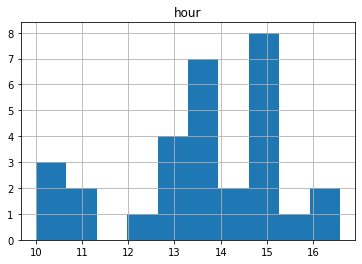

In [16]:
ef5['hour'] = ef5['Time Average'].map(lambda x: x.total_seconds() / 60 / 60)
ef5.hist(column='hour')

## b. What time of the day is the most commonly occurring hottest time

In [17]:
ef1['ddtm0'].mode()
ef1['ddtm0'].value_counts().head()

0   13:00:00
1   14:50:00
2   15:00:00
dtype: timedelta64[ns]

13:00:00    4
14:50:00    4
15:00:00    4
13:40:00    3
14:40:00    3
Name: ddtm0, dtype: int64

In [18]:
## Top ten hottest times on distinct days
gp0 = ef5.groupby('date')[tag].max()
ef6 = gp0.to_frame().reset_index()
ef6;

In [19]:
## Date has re-appeared as a string, so
s1 = pd.to_datetime(ef6['date'], format="%Y-%m-%d")
s1[0]
ef6['date'] = s1
ef6.info()

Timestamp('2006-06-01 00:00:00')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
date                   30 non-null datetime64[ns]
Outside Temperature    30 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 560.0 bytes


In [20]:
ef6.head()
ef6.info()

,date,Outside Temperature
0,2006-06-01,17.2
1,2006-06-02,17.7
2,2006-06-03,19.6
3,2006-06-04,18.0
4,2006-06-05,16.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
date                   30 non-null datetime64[ns]
Outside Temperature    30 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 560.0 bytes


In [21]:
# ef1.head();
# ef1.info();
ef1['date'] = ef1['dttm0'].map(lambda x: pd.Timestamp(x).normalize())
# ef1.info();
ff1 = ef1[['date', 'ddtm0']]
ff1.head()

,date,ddtm0
0,2006-06-01,15:00:00
1,2006-06-01,15:10:00
2,2006-06-02,13:20:00
3,2006-06-03,14:50:00
4,2006-06-03,15:00:00


In [22]:
## Which are the Top Ten hottest times on distinct days, preferably sorted by date order.
# Not very clearly phrased, but I think it means for 10 distinct days, find the hottest times
ef7 = ef6.merge(ff1, on='date').sort_values(tag, ascending=False)

In [23]:
t10 = ef7['date'].to_frame().drop_duplicates()[:10]
t10

,date
9,2006-06-06
20,2006-06-11
51,2006-06-28
30,2006-06-15
11,2006-06-08
16,2006-06-10
10,2006-06-07
4,2006-06-03
21,2006-06-12
34,2006-06-17


## c. Which are the Top Ten hottest times on distinct days, preferably sorted by date order.

In [24]:
ff1.merge(t10, on='date').sort_values('date')

,date,ddtm0
0,2006-06-03,14:50:00
1,2006-06-03,15:00:00
2,2006-06-06,14:20:00
3,2006-06-07,13:00:00
4,2006-06-08,16:20:00
5,2006-06-08,16:30:00
6,2006-06-08,16:40:00
7,2006-06-08,16:50:00
9,2006-06-10,13:10:00
8,2006-06-10,13:00:00
